<a href="https://colab.research.google.com/github/GugaTenorio/dio-desafio-git-github-primeiro-repositorio/blob/main/Analise_Dados_Supermercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importar a biblioteca pandas
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
#Leitura do arquivo que servirá como base de dados, neste caso, é um arquivo csv, encontrado no endereço https://www.kaggle.com/aungpyaeap/supermarket-sales , 
#arquivo já salvo no google drive para facilitar a construção dessa atividade. 
df = pd.read_csv("/content/drive/MyDrive/Dataset-Supermercado/supermarket_sales - Sheet1.csv")

In [4]:
#Visualizar as 5 primeiras linhas
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
#Renomear a nomenclatura das colunas
df=df.rename(columns={"Invoice ID":"ID Pedido", "Branch":"Filial", "City":"Cidade", "Customer type":"Tipo de Cliente", "Gender":"Genero", "Product line":"Linha de Produto", "Unit price":"Preco Unitario","Quantity":"Quantidade", "Tax 5%":"Taxa 5%", "Total":"Venda Total", "Date":"Data da Compra", "Time":"Horario", "Payment":"Tipo de Pagto", "cogs":"Venda Liquida", "gross margin percentage":"Porcentagem Margem Bruta", "gross income":"Renda Bruta", "Rating":"Notas dos Clientes"})

In [6]:
#Retornar as primeiras linhas
df.head()


,ID Pedido,Filial,Cidade,Tipo de Cliente,Genero,Linha de Produto,Preco Unitario,Quantidade,Taxa 5%,Venda Total,Data da Compra,Horario,Tipo de Pagto,Venda Liquida,Porcentagem Margem Bruta,Renda Bruta,Notas dos Clientes
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
#retornar quantidade de linhas e colunas
df.shape

(1000, 17)

In [8]:
#Retornar os tipos de dados de cada coluna
df.dtypes

ID Pedido                    object
Filial                       object
Cidade                       object
Tipo de Cliente              object
Genero                       object
Linha de Produto             object
Preco Unitario              float64
Quantidade                    int64
Taxa 5%                     float64
Venda Total                 float64
Data da Compra               object
Horario                      object
Tipo de Pagto                object
Venda Liquida               float64
Porcentagem Margem Bruta    float64
Renda Bruta                 float64
Notas dos Clientes          float64
dtype: object

In [9]:
#Transformar o tipo de coluna Data da Compra que está como object para datetime.
df["Data da Compra"] = pd.to_datetime(df["Data da Compra"])

In [10]:
df.dtypes

ID Pedido                           object
Filial                              object
Cidade                              object
Tipo de Cliente                     object
Genero                              object
Linha de Produto                    object
Preco Unitario                     float64
Quantidade                           int64
Taxa 5%                            float64
Venda Total                        float64
Data da Compra              datetime64[ns]
Horario                             object
Tipo de Pagto                       object
Venda Liquida                      float64
Porcentagem Margem Bruta           float64
Renda Bruta                        float64
Notas dos Clientes                 float64
dtype: object

In [ ]:
#Retornar as últimas linhas
df.tail()

In [12]:
#Retorna informações estatísticas. Count = total de linhas para cada Coluna, Mean = Média, std = desvio padrão,
#min = valor mínimo, (25%,50%(mediana)e 75%) = Quartis, max = valor máximo. 
df.describe()


,Preco Unitario,Quantidade,Taxa 5%,Venda Total,Venda Liquida,Porcentagem Margem Bruta,Renda Bruta,Notas dos Clientes
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [13]:
#Criar uma nova coluna com os meses e dias
df["Mes"],df["Dia"] = (df["Data da Compra"].dt.month,df["Data da Compra"].dt.day)

In [14]:
df.head()

,ID Pedido,Filial,Cidade,Tipo de Cliente,Genero,Linha de Produto,Preco Unitario,Quantidade,Taxa 5%,Venda Total,Data da Compra,Horario,Tipo de Pagto,Venda Liquida,Porcentagem Margem Bruta,Renda Bruta,Notas dos Clientes,Mes,Dia
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,1,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,3,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,1,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2,8


In [15]:
df.describe()

,Preco Unitario,Quantidade,Taxa 5%,Venda Total,Venda Liquida,Porcentagem Margem Bruta,Renda Bruta,Notas dos Clientes,Mes,Dia
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,1.993000,15.256000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,0.835254,8.693563
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,1.000000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,1.000000,8.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,3.000000,23.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,3.000000,31.000000


In [16]:
#Ao gerar as informações estatística com o df.describe acima verifiquei que essa base de dados só possui 3 meses, Janeiro, Fevereiro e Março, analisando o valor min=1 e max=3
#Para analisar de forma mais específica utilizei esse comando abaixo: 
df["Mes"].min(), df["Mes"].max()

(1, 3)

In [32]:
#Dicionário com os meses
dict_Mes={1:"Jan", 2: "Fev", 3: "Mar"}

In [34]:
#Substituir na Coluna Mes pela abreviação do mês (Jan,Fev;Mar) para melhor visualização.
df["Mes"]=df["Mes"].map(dict_Mes)

In [36]:
df.head(3)

,ID Pedido,Filial,Cidade,Tipo de Cliente,Genero,Linha de Produto,Preco Unitario,Quantidade,Taxa 5%,Venda Total,Data da Compra,Horario,Tipo de Pagto,Venda Liquida,Porcentagem Margem Bruta,Renda Bruta,Notas dos Clientes,Mes,Dia
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Jan,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Mar,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mar,3


In [17]:
#Poderia gerar os meses assim também.
df["Mes"].unique()

array([1, 3, 2])

In [47]:
#Quantos pedidos por filial, Com essa análise sabemos que a Filial A possui o maior número de pedidos.
df.groupby("Filial")["ID Pedido"].nunique()


Filial
A    340
B    332
C    328
Name: ID Pedido, dtype: int64

Text(0, 0.5, 'Filial')

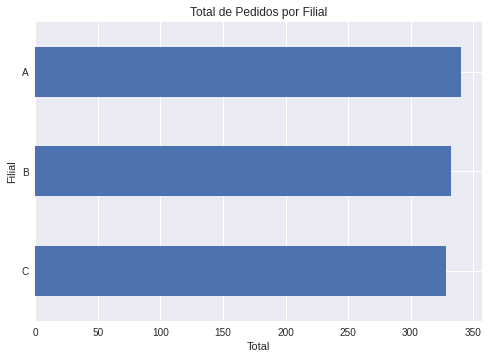

In [75]:
#Gráfico  de Barras Horizontais - total de pedidos por filial.
df.groupby("Filial")["ID Pedido"].nunique().sort_values(ascending=True).plot.barh(title="Total de Pedidos por Filial")
plt.xlabel("Total")
plt.ylabel("Filial")

Text(0, 0.5, 'Total')

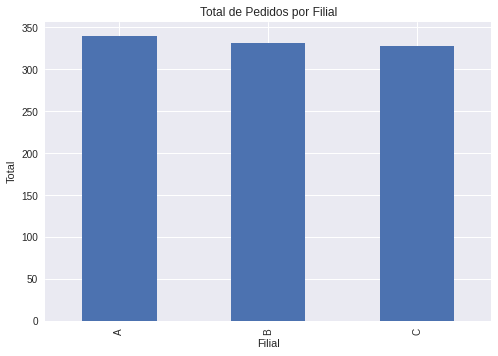

In [76]:
#Gráfico  de Barras - total de pedidos por filial.
df.groupby("Filial")["ID Pedido"].nunique().sort_values(ascending=False).plot.bar(title="Total de Pedidos por Filial")
plt.xlabel("Filial")
plt.ylabel("Total")

In [77]:
#Venda Total com taxas por filial. Verifca-se que a Filial C tem o melhor resultado de Vendas, mesmo com um número menor de pedidos.
df.groupby("Filial")["Venda Total"].sum()

Filial
A    106200.3705
B    106197.6720
C    110568.7065
Name: Venda Total, dtype: float64

Text(0, 0.5, 'Total')

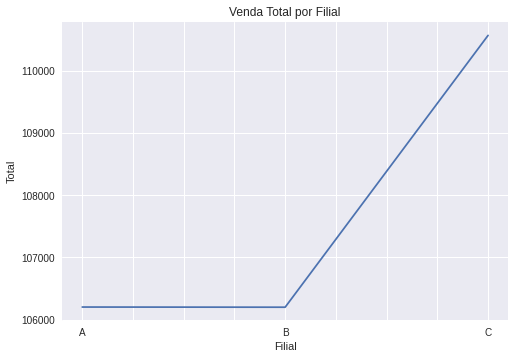

In [82]:
#Gráfico  de Linhas - Venda Total por filial.
df.groupby("Filial")["Venda Total"].sum().plot(title="Venda Total por Filial")
plt.xlabel("Filial")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

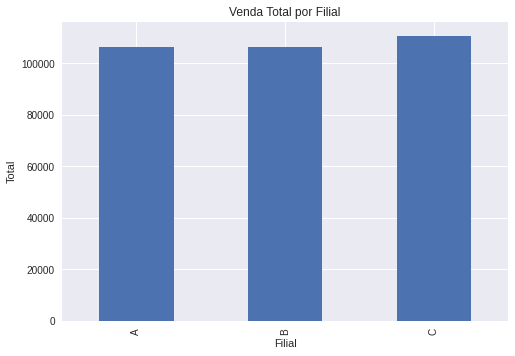

In [81]:
#Gráfico  de Barras - total de pedidos por filial.
df.groupby("Filial")["Venda Total"].sum().plot.bar(title="Venda Total por Filial")
plt.xlabel("Filial")
plt.ylabel("Total")

In [20]:
#Taxa de 5% por filial
df.groupby("Filial")["Taxa 5%"].sum()

Filial
A    5057.1605
B    5057.0320
C    5265.1765
Name: Taxa 5%, dtype: float64

In [21]:
#Venda líquida por filial
df.groupby("Filial")["Venda Liquida"].sum()

Filial
A    101143.21
B    101140.64
C    105303.53
Name: Venda Liquida, dtype: float64

In [22]:
#Média das Notas dos clientes por Filial - indicativo de satisfação. 
df.groupby("Filial")["Notas dos Clientes"].mean()

Filial
A    7.027059
B    6.818072
C    7.072866
Name: Notas dos Clientes, dtype: float64

Text(0, 0.5, 'Média das Notas')

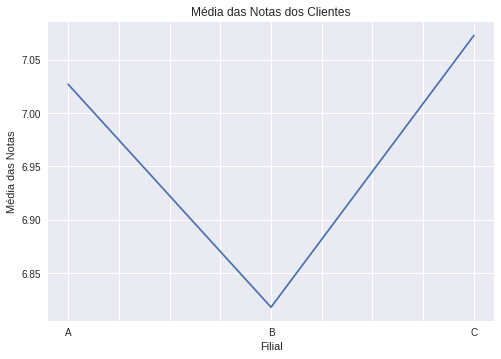

In [84]:
#Gráfico de Linha - Média das Notas dos Clientes por Filial
df.groupby("Filial")["Notas dos Clientes"].mean().plot(title="Média das Notas dos Clientes")
plt.xlabel("Filial")
plt.ylabel("Média das Notas")


In [23]:
#Qual Gênero compra mais?
df.groupby("Genero")["Venda Total"].sum()

Genero
Female    167882.925
Male      155083.824
Name: Venda Total, dtype: float64

In [26]:
#Venda liquida Total
df["Venda Liquida"].sum()


307587.38

In [28]:
#Venda Total com as taxas
df["Venda Total"].sum()

322966.749

In [29]:
#Total da taxa de 5%
df["Taxa 5%"].sum()

15379.368999999999

In [39]:
#verificar se temos dados faltantes em nossa base
df.isnull().sum()


ID Pedido                   0
Filial                      0
Cidade                      0
Tipo de Cliente             0
Genero                      0
Linha de Produto            0
Preco Unitario              0
Quantidade                  0
Taxa 5%                     0
Venda Total                 0
Data da Compra              0
Horario                     0
Tipo de Pagto               0
Venda Liquida               0
Porcentagem Margem Bruta    0
Renda Bruta                 0
Notas dos Clientes          0
Mes                         0
Dia                         0
dtype: int64

In [85]:
df.head()



,ID Pedido,Filial,Cidade,Tipo de Cliente,Genero,Linha de Produto,Preco Unitario,Quantidade,Taxa 5%,Venda Total,Data da Compra,Horario,Tipo de Pagto,Venda Liquida,Porcentagem Margem Bruta,Renda Bruta,Notas dos Clientes,Mes,Dia
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Jan,5
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Mar,8
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Mar,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Jan,27
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Fev,8


In [87]:
#Venda total por tipo de pagamento 
df.groupby("Tipo de Pagto")["Venda Total"].sum()

Tipo de Pagto
Cash           112206.570
Credit card    100767.072
Ewallet        109993.107
Name: Venda Total, dtype: float64

Text(0, 0.5, 'Tipo de Pagto')

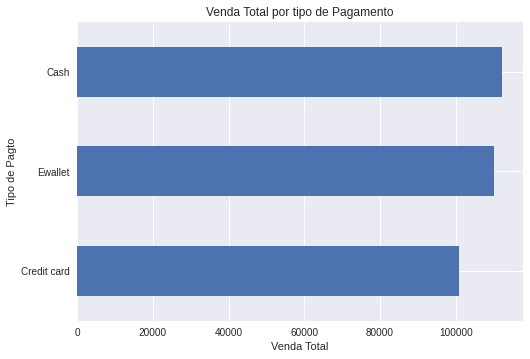

In [90]:
#Gráfico de barras horizontais - Venda total por tipo de pagamento 
df.groupby("Tipo de Pagto")["Venda Total"].sum().sort_values(ascending=True).plot.barh(title="Venda Total por tipo de Pagamento")
plt.xlabel("Venda Total")
plt.ylabel("Tipo de Pagto")


In [101]:
df.groupby("Filial")["Venda Total"].sum()

Filial
A    106200.3705
B    106197.6720
C    110568.7065
Name: Venda Total, dtype: float64

In [108]:
vendas_mes=df.groupby("Mes")["Venda Total"].mean().sort_values(ascending=False).reset_index()

In [109]:
vendas_mes

,Mes,Venda Total
0,Jan,330.374625
1,Fev,320.856020
2,Mar,317.262339


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

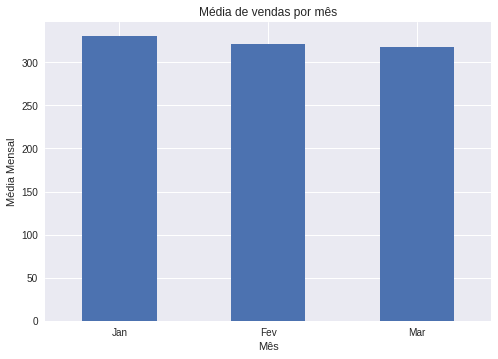

In [113]:
#Grafico de Barras - Média de vendas por mês.
vendas_mes=df.groupby("Mes")["Venda Total"].mean().sort_values(ascending=False).plot.bar(title="Média de vendas por mês")
plt.xlabel("Mês")
plt.ylabel("Média Mensal")
plt.xticks(rotation="horizontal")